In [173]:
import re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import tensorflow as tf
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [174]:
data = "Capitalism is an economic and social system built on the principles of private ownership, \
voluntary exchange, and competitive markets, where individuals and businesses are free to pursue profit while \
producing goods and services. At its core, capitalism operates on the belief that when people are allowed to \
act in their own self-interest—choosing how to invest capital, where to work, what to produce, and what to \
buy—the resulting competition and innovation will ultimately benefit society as a whole. Unlike centrally \
planned economies, where the government controls production and distribution, capitalism emphasizes \
decentralized decision-making driven by supply and demand. Prices are determined in open markets, which \
encourages efficiency, specialization, and technological advancement as businesses constantly strive to \
outperform competitors and attract consumers. Historically, capitalism gained prominence during the Industrial \
Revolution, when technological breakthroughs and expanding trade networks allowed privately owned businesses \
to grow rapidly, transforming agricultural societies into industrial and global economic powerhouses. \
Supporters argue that capitalism fuels growth, rewards innovation, and empowers individuals by giving them \
the freedom to create wealth, invest in opportunities, and shape their economic destiny. It has lifted \
millions out of poverty, accelerated scientific and technological progress, and promoted entrepreneurship \
by rewarding risk-taking and creativity. However, capitalism also comes with significant criticisms and \
challenges. One recurring concern is economic inequality, as wealth and resources tend to accumulate \
among those who already possess capital, advanced skills, or ownership over productive assets. This \
concentration of wealth can lead to disparities in access to education, healthcare, housing, and \
social mobility. Additionally, profit-driven incentives may sometimes lead corporations to prioritize \
financial gain over environmental sustainability, workers’ rights, or ethical responsibility. Critics \
argue that without appropriate regulation, capitalism can foster monopolies, exploit labor, encourage \
consumerism, and ignore social welfare. These criticisms have led many modern societies to adopt \
mixed-economy models, blending free-market mechanisms with government intervention—such as social \
safety nets, environmental regulations, and labor protections—to maintain both economic dynamism and \
social stability. Despite debates surrounding its flaws, capitalism remains the dominant global economic \
system, continuously evolving in response to social demands, political pressures, and technological disruptions.\
In today’s interconnected world, capitalism has adapted to new realities, including digital economies, \
global trade networks, and the rise of multinational corporations with influence across borders. Concepts \
like stakeholder capitalism, ethical investing, and sustainable development have emerged as ways to \
address criticisms while preserving market freedoms. Ultimately, capitalism is not a static system but \
a dynamic framework shaped by cultural values, institutional rules, and collective human behavior. Whether \
praised for its ability to create prosperity or criticized for widening inequality, capitalism continues \
to shape modern civilization, drive innovation, and influence how societies organize economic life. Its \
future will likely depend on how effectively nations balance free-market principles with fairness, \
sustainability, and inclusive growth."

In [175]:
# Normalization
data_lower = data.lower()
data_no_punc = re.sub(r'[^\w\s]','', data_lower)
stop_words = set(stopwords.words('english'))
no_stopwords_string = ''
data_list = data_no_punc.split()
for word in data_list:
  if((word in stop_words) == False):
    no_stopwords_string += word
  no_stopwords_string += ' '

# Normalized Text
print(f"Normalized Text: {no_stopwords_string}")

# Word Tokenized Text
normalized_list = no_stopwords_string.split()
print(f"Word Tokenized Text: {normalized_list}")

Normalized Text: capitalism   economic  social system built   principles  private ownership voluntary exchange  competitive markets  individuals  businesses  free  pursue profit  producing goods  services   core capitalism operates   belief   people  allowed  act    selfinterestchoosing   invest capital   work   produce    buythe resulting competition  innovation  ultimately benefit society   whole unlike centrally planned economies   government controls production  distribution capitalism emphasizes decentralized decisionmaking driven  supply  demand prices  determined  open markets  encourages efficiency specialization  technological advancement  businesses constantly strive  outperform competitors  attract consumers historically capitalism gained prominence   industrial revolution  technological breakthroughs  expanding trade networks allowed privately owned businesses  grow rapidly transforming agricultural societies  industrial  global economic powerhouses supporters argue  capita

In [176]:
# Word Tokenization
data_tokenized = word_tokenize(no_stopwords_string)
print(f"Tokenized data: {data_tokenized}")

Tokenized data: ['capitalism', 'economic', 'social', 'system', 'built', 'principles', 'private', 'ownership', 'voluntary', 'exchange', 'competitive', 'markets', 'individuals', 'businesses', 'free', 'pursue', 'profit', 'producing', 'goods', 'services', 'core', 'capitalism', 'operates', 'belief', 'people', 'allowed', 'act', 'selfinterestchoosing', 'invest', 'capital', 'work', 'produce', 'buythe', 'resulting', 'competition', 'innovation', 'ultimately', 'benefit', 'society', 'whole', 'unlike', 'centrally', 'planned', 'economies', 'government', 'controls', 'production', 'distribution', 'capitalism', 'emphasizes', 'decentralized', 'decisionmaking', 'driven', 'supply', 'demand', 'prices', 'determined', 'open', 'markets', 'encourages', 'efficiency', 'specialization', 'technological', 'advancement', 'businesses', 'constantly', 'strive', 'outperform', 'competitors', 'attract', 'consumers', 'historically', 'capitalism', 'gained', 'prominence', 'industrial', 'revolution', 'technological', 'breakth

In [177]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
data_lemmatized = []
# DT->Determiner, JJ->Adjective, NN->Noun, VBZ->Verb, IN->Preposition, RB->Adverb, VBN->Past Participle Verb,
# NNS->Noun Plural, VBP->Verb Non-3rd Person Singular Present, VBG->Verb Gerund or Present Participle
# JJR->Comparitive Adjective, JJS->Superlative Adjective, VBD->Verb Past Tense
data_pos_tokens = pos_tag(data_tokenized)
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return 'n'
    elif tag.startswith('R'):
        return 'r'
    else:
        return 'n'
data_lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in data_pos_tokens]
print(f"Lemmatized data: {data_lemmatized}")

Lemmatized data: ['capitalism', 'economic', 'social', 'system', 'build', 'principle', 'private', 'ownership', 'voluntary', 'exchange', 'competitive', 'market', 'individual', 'business', 'free', 'pursue', 'profit', 'produce', 'good', 'service', 'core', 'capitalism', 'operate', 'belief', 'people', 'allow', 'act', 'selfinterestchoosing', 'invest', 'capital', 'work', 'produce', 'buythe', 'result', 'competition', 'innovation', 'ultimately', 'benefit', 'society', 'whole', 'unlike', 'centrally', 'plan', 'economy', 'government', 'control', 'production', 'distribution', 'capitalism', 'emphasize', 'decentralize', 'decisionmaking', 'driven', 'supply', 'demand', 'price', 'determine', 'open', 'market', 'encourage', 'efficiency', 'specialization', 'technological', 'advancement', 'business', 'constantly', 'strive', 'outperform', 'competitor', 'attract', 'consumer', 'historically', 'capitalism', 'gain', 'prominence', 'industrial', 'revolution', 'technological', 'breakthrough', 'expand', 'trade', 'netw

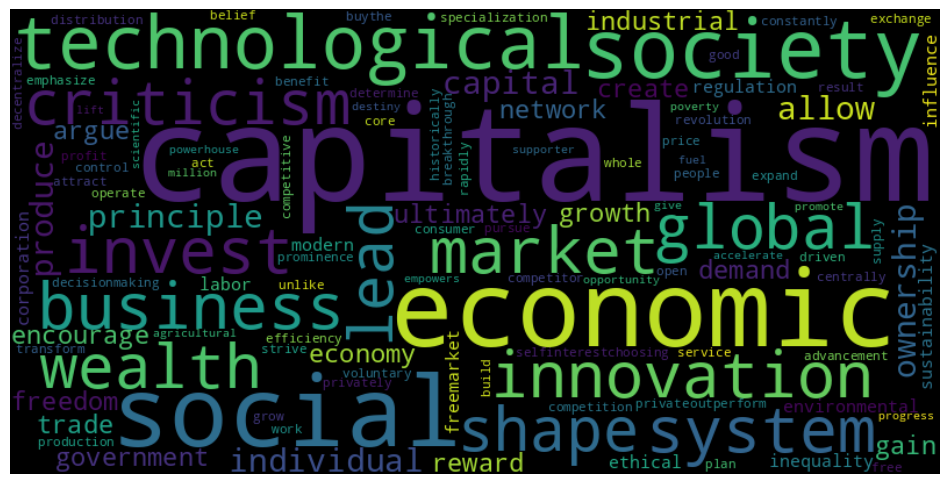

In [178]:
# Wordcloud
wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',
        stopwords=STOPWORDS,
        min_font_size=10
    ).generate(" ".join(data_lemmatized))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Frequency')

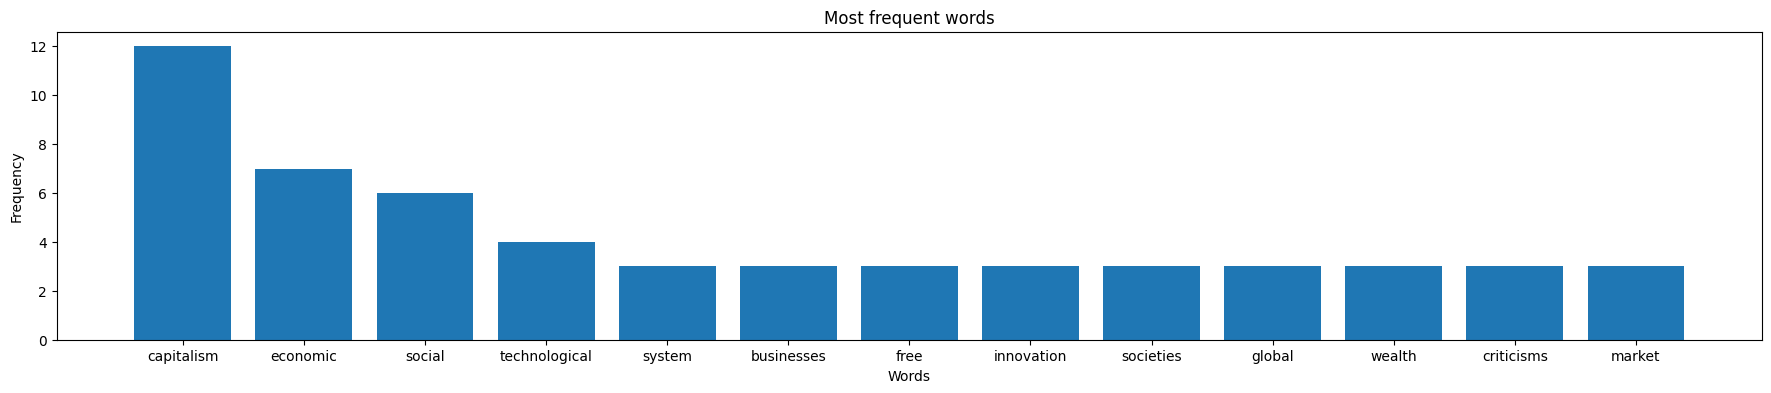

In [179]:
# Word Count
word_count = {}
data_sent_tokenized = sent_tokenize(data_lower)
for i in range(len(data_sent_tokenized)):
  data_sent_tokenized[i] = re.sub(r'\W', ' ', data_sent_tokenized[i])
  data_sent_tokenized[i] = re.sub(r'\s+', ' ', data_sent_tokenized[i])

for sent in data_sent_tokenized:
  words = word_tokenize(sent)
  for word in words:
    if(word not in stop_words):
      if(word in word_count):
        word_count[word] += 1
      else:
        word_count[word] = 1

word_count_sorted = sorted(word_count.items(), key = lambda item: item[1], reverse = True)
word_count_sorted_subset = []
for item in word_count_sorted:
  if(item[1] > 2):
    word_count_sorted_subset.append(item)

plt.figure(figsize = (22, 4))
plt.bar([item[0] for item in word_count_sorted_subset], [item[1] for item in word_count_sorted_subset])
plt.title('Most frequent words')
plt.xlabel('Words')
plt.ylabel('Frequency')

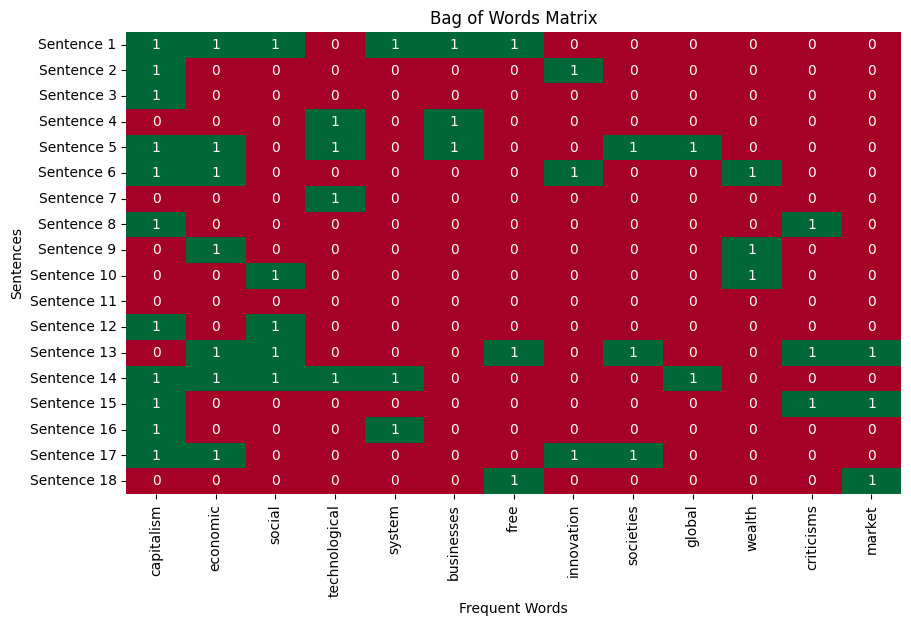

In [180]:
# Bag of Words
word_freq = [item[0] for item in word_count_sorted_subset]
bog_matrix = []
for sent in data_sent_tokenized:
  vector = []
  sent_words = word_tokenize(sent)
  for word in word_freq:
    if(word in sent_words):
      vector.append(1)
    else:
      vector.append(0)
  bog_matrix.append(vector)
bog_matrix = np.asarray(bog_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(bog_matrix, cmap='RdYlGn', cbar=False, annot=True, fmt="d", xticklabels=word_freq, yticklabels=[f"Sentence {i+1}" for i in range(len(data_sent_tokenized))])

plt.title('Bag of Words Matrix')
plt.xlabel('Frequent Words')
plt.ylabel('Sentences')
plt.show()

In [181]:
# TF-IDF
data_sent_tokenized_new = []
for sent in data_sent_tokenized:
  words = word_tokenize(sent)
  new_sent = []
  for word in words:
    if(word not in stop_words):
      new_sent.append(word)
  data_sent_tokenized_new.append(" ".join(new_sent))

vectorizer = TfidfVectorizer()
result = vectorizer.fit_transform(data_sent_tokenized_new)
print("IDF values")
i = 0
for e1, e2 in zip(vectorizer.get_feature_names_out(), vectorizer.idf_):
  if(i < 5):
    print(e1 + ": " + str(e2))
  else:
    break
  i+=1
print(f"Word Index: {vectorizer.vocabulary_}")
print(f"\n(Document number, Word index)\tTF-IDF values\n{result}")

IDF values
ability: 3.2512917986064953
accelerated: 3.2512917986064953
access: 3.2512917986064953
accumulate: 3.2512917986064953
across: 3.2512917986064953
Word Index: {'capitalism': 32, 'economic': 78, 'social': 217, 'system': 231, 'built': 28, 'principles': 177, 'private': 179, 'ownership': 166, 'voluntary': 241, 'exchange': 93, 'competitive': 40, 'markets': 145, 'individuals': 123, 'businesses': 29, 'free': 101, 'pursue': 191, 'profit': 185, 'producing': 182, 'goods': 110, 'services': 212, 'core': 51, 'operates': 161, 'belief': 23, 'people': 167, 'allowed': 13, 'act': 5, 'self': 211, 'interest': 130, 'choosing': 35, 'invest': 132, 'capital': 31, 'work': 249, 'produce': 181, 'buy': 30, 'resulting': 201, 'competition': 39, 'innovation': 127, 'ultimately': 238, 'benefit': 24, 'society': 219, 'whole': 246, 'unlike': 239, 'centrally': 33, 'planned': 168, 'economies': 79, 'government': 111, 'controls': 50, 'production': 183, 'distribution': 72, 'emphasizes': 85, 'decentralized': 60, 'deci

In [182]:
# Word2Vec with CBOW
data_sent_tokenized_cbow = sent_tokenize(data_lower)
for i in range(len(data_sent_tokenized_cbow)):
  data_sent_tokenized_cbow[i] = re.sub(r'\W', ' ', data_sent_tokenized_cbow[i])
  data_sent_tokenized_cbow[i] = re.sub(r'\s+', ' ', data_sent_tokenized_cbow[i])

all_words = []
for sent in data_sent_tokenized_cbow:
  words = word_tokenize(sent)
  for word in words:
    all_words.append(word)
words_set = set(all_words)
vocab_size = len(words_set)
one_hot_map = {}
for i, word in enumerate(words_set):
  one_hot_map[word] = np.zeros(len(words_set))
  one_hot_map[word][i] = 1

window_size = 3
context_size_half = int((window_size - 1) / 2)
embedding_size = 12
features = []
target = []

for sent in data_sent_tokenized_cbow:
  words = word_tokenize(sent)
  for i in range(context_size_half, len(words) - context_size_half):
    target.append(one_hot_map[words[i]])
    feature = []
    for k in range(1, context_size_half + 1):
      feature.append(one_hot_map[words[i - k]])
      feature.append(one_hot_map[words[i + k]])
    features.append(feature)
# build NN
def build_nn(features, target, hidden_units, vector_size):
  input1 = tf.keras.Input(shape = (vector_size,), name = 'input1')
  input2 = tf.keras.Input(shape = (vector_size,), name = 'input2')
  merged = tf.keras.layers.Concatenate()([input1, input2])
  h = tf.keras.layers.Dense(hidden_units, activation='relu')(merged)
  h = tf.keras.layers.Dropout(0.5)(h)
  output = tf.keras.layers.Dense(vector_size, activation='linear', name='output')(h)
  model = tf.keras.Model(inputs=[input1, input2], outputs=output)
  return model

model = build_nn(features, target, hidden_units=embedding_size, vector_size = vocab_size)
print(model.summary())

model.compile(optimizer = 'adam', loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
feature1 = np.array([feature_i[0] for feature_i in features])
feature2 = np.array([feature_i[1] for feature_i in features])
target_np = np.array(target)
model.fit([feature1, feature2], target_np, epochs = 20, validation_split=0.1)

Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input1 (InputLayer) │ (None, 297)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input2 (InputLayer) │ (None, 297)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_44      │ (None, 594)       │          0 │ input1[0][0],     │
│ (Concatenate)       │                   │            │ input2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_47 (Dense)    │ (None, 12)        │      7,140 │ concatenate_44[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12)        │          0 │ dense_47[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 297)       │      3,861 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,001 (42.97 KB)

 Trainable params: 11,001 (42.97 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0028 - loss: 5.6930 - val_accuracy: 0.0000e+00 - val_loss: 5.6952
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0345 - loss: 5.6839 - val_accuracy: 0.0227 - val_loss: 5.6970
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0370 - loss: 5.6746 - val_accuracy: 0.0227 - val_loss: 5.6992
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0570 - loss: 5.6658 - val_accuracy: 0.0227 - val_loss: 5.7017
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0675 - loss: 5.6537 - val_accuracy: 0.0227 - val_loss: 5.7043
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0558 - loss: 5.6463 - val_accuracy: 0.0227 - val_loss: 5.7072
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0537 - loss: 5.6251 - val_accuracy: 0.0227 - val_loss: 5.7102
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0555 - loss: 5.6100 - val_accuracy: 0.0227 -